# r/AnarchyChess Analysis
- focus on board 2

In [4]:
from PIL import Image
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
from pyspark.sql import functions as F
from pyspark.sql.types import TimestampType



# import numpy as np
# import imageio.v2 as imageio  # for GIF creation
# import os
# from datetime import datetime
# import pandas as pd
# import matplotlib.dates as mdates

final_canvas = Image.open("2022_canvas_final.png") # load in final r/place 2022 canva

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("ReadParquet").getOrCreate() # initialize spark session

parquet_file = "2022pyarrow.parquet"

df = spark.read.parquet(parquet_file)
df.show(1)


25/02/10 02:17:44 WARN Utils: Your hostname, Bernettes-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.144.44.254 instead (on interface en0)
25/02/10 02:17:44 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/10 02:17:44 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/02/10 02:17:45 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


+--------------------+-----------+---+----+-----------+
|           timestamp|pixel_color|  x|   y|user_id_int|
+--------------------+-----------+---+----+-----------+
|2022-04-04 00:53:...|    #00CCC0|826|1048|          0|
+--------------------+-----------+---+----+-----------+
only showing top 1 row



## board 2

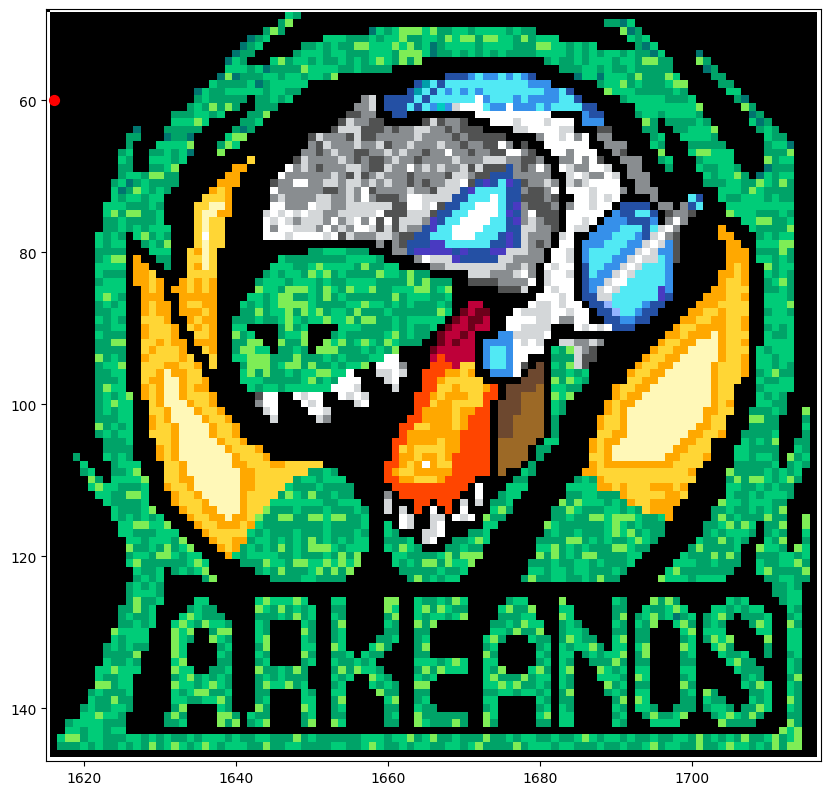

In [58]:
board2 = [(1616, 60)] # center of board

width, height = 2000, 100 # zoom into these dim

# create figure
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(final_canvas)

# mark top pixels
for (x, y) in board2:
    ax.scatter(x, y, color='red', s=50)  # red dot at pixel location

ax.set_xlim(1615, 1717)  # adjust 
ax.set_ylim(147, 48)
plt.show()

### Timelapse of Board 2

In [17]:
# define board2 coordinates and the filter ranges
x_min, x_max = 1615, 1717
y_min, y_max = 48, 147

# get vals for timelapse
df_board2 = df.filter(
    (F.col("x") >= x_min) & 
    (F.col("x") <= x_max) &
    (F.col("y") >= y_min) & 
    (F.col("y") <= y_max) & 
    (F.col("timestamp").cast("timestamp") >= F.lit("2022-04-02 16:30:00").cast("timestamp"))
).withColumn(
    "time_bin", F.date_trunc("minute", F.col("timestamp")).alias("time_bin")
).groupBy("time_bin", "x", "y").agg(
    F.last("pixel_color").alias("last_pixel_color")  # Get the last pixel color per group
)

df_board2.show()

+-------------------+----+---+----------------+
|           time_bin|   x|  y|last_pixel_color|
+-------------------+----+---+----------------+
|2022-04-02 16:30:00|1636|133|         #FF4500|
|2022-04-02 16:30:00|1641| 54|         #BE0039|
|2022-04-02 16:30:00|1641| 95|         #2450A4|
|2022-04-02 16:30:00|1644|122|         #FF3881|
|2022-04-02 16:30:00|1646| 74|         #000000|
|2022-04-02 16:30:00|1652|144|         #00CC78|
|2022-04-02 16:30:00|1677|126|         #00A368|
|2022-04-02 16:30:00|1679|125|         #00A368|
|2022-04-02 16:30:00|1699| 93|         #FFA800|
|2022-04-02 16:30:00|1703|125|         #000000|
|2022-04-02 16:30:00|1707|139|         #BE0039|
|2022-04-02 16:30:00|1707|141|         #BE0039|
|2022-04-02 16:30:00|1714|140|         #FFD635|
|2022-04-02 16:31:00|1660|117|         #000000|
|2022-04-02 16:31:00|1661|117|         #000000|
|2022-04-02 16:31:00|1671| 82|         #FFA800|
|2022-04-02 16:31:00|1678|101|         #FFD635|
|2022-04-02 16:31:00|1685| 72|         #

In [ ]:
# define board2 coordinates and the filter ranges
x_min, x_max = 1615, 1717
y_min, y_max = 48, 147

# get vals for timelapse
df_board2 = df.filter(
    (F.col("x") >= x_min) & 
    (F.col("x") <= x_max) &
    (F.col("y") >= y_min) & 
    (F.col("y") <= y_max) & 
    (F.col("timestamp").cast("timestamp") >= F.lit("2022-04-02 16:30:00").cast("timestamp"))
).withColumn(
    "time_bin", 
    F.date_format("timestamp", "yyyy-MM-dd HH:mm:00")  # Format to the beginning of the hour
).withColumn(
    "time_bin", 
    F.when(F.minute("timestamp") % 30 == 0, F.col("time_bin")).otherwise(
        F.date_add(F.col("time_bin"), 1)
    )  # Adjust for half-hour
)

df_board2 = df_board2.groupBy("time_bin", "x", "y").agg(
    F.last("pixel_color").alias("last_pixel_color")  # Get the last pixel color per group
)

# Show results (or use .collect() for actual data in a list form)
df_board2.show()


+-------------------+----+---+----------------+
|           time_bin|   x|  y|last_pixel_color|
+-------------------+----+---+----------------+
|2022-04-02 16:30:00|1632| 78|         #FFD635|
|2022-04-02 16:30:00|1636|129|         #2450A4|
|2022-04-02 16:30:00|1636|133|         #FF4500|
|2022-04-02 16:30:00|1640| 73|         #000000|
|2022-04-02 16:30:00|1641| 54|         #BE0039|
|2022-04-02 16:30:00|1641| 95|         #2450A4|
|2022-04-02 16:30:00|1644|122|         #FF3881|
|2022-04-02 16:30:00|1645| 85|         #FF4500|
|2022-04-02 16:30:00|1646| 72|         #000000|
|2022-04-02 16:30:00|1646| 74|         #000000|
|2022-04-02 16:30:00|1650|101|         #FF4500|
|2022-04-02 16:30:00|1651| 90|         #FF4500|
|2022-04-02 16:30:00|1652|144|         #00CC78|
|2022-04-02 16:30:00|1653|144|         #00CC78|
|2022-04-02 16:30:00|1656|129|         #898D90|
|2022-04-02 16:30:00|1659| 81|         #FFD635|
|2022-04-02 16:30:00|1666| 66|         #00756F|
|2022-04-02 16:30:00|1670| 56|         #

In [25]:
new = df.filter(
    (F.col("x") >= x_min) & 
    (F.col("x") <= x_max) &
    (F.col("y") >= y_min) & 
    (F.col("y") <= y_max) & 
    (F.col("timestamp").cast("timestamp") >= F.lit("2022-04-02 16:30:00").cast("timestamp"))
).withColumn(
    "time_bin", 
    F.date_format("timestamp", "yyyy-MM-dd HH:mm:00")  # Truncate to nearest minute
)

new = new.groupBy("time_bin", "x", "y").agg(
    F.last("pixel_color").alias("last_pixel_color")  # Get the last pixel color per group
)

# Show the results
new.show()

+-------------------+----+---+----------------+
|           time_bin|   x|  y|last_pixel_color|
+-------------------+----+---+----------------+
|2022-04-02 16:30:00|1641| 54|         #BE0039|
|2022-04-02 16:30:00|1645| 85|         #FF4500|
|2022-04-02 16:30:00|1651| 90|         #FF4500|
|2022-04-02 16:30:00|1670| 56|         #000000|
|2022-04-02 16:30:00|1677|125|         #00A368|
|2022-04-02 16:30:00|1699| 93|         #FFA800|
|2022-04-02 16:30:00|1703|125|         #000000|
|2022-04-02 16:30:00|1704| 59|         #FF4500|
|2022-04-02 16:30:00|1707|139|         #BE0039|
|2022-04-02 16:30:00|1707|141|         #BE0039|
|2022-04-02 16:30:00|1711| 52|         #000000|
|2022-04-02 16:30:00|1715|125|         #00A368|
|2022-04-02 16:31:00|1618| 62|         #7EED56|
|2022-04-02 16:31:00|1653|141|         #FF4500|
|2022-04-02 16:31:00|1661|117|         #000000|
|2022-04-02 16:31:00|1662|117|         #000000|
|2022-04-02 16:31:00|1671| 82|         #FFA800|
|2022-04-02 16:31:00|1676|101|         #

### Data Visualizations 

data visualization ideas:
1. pixel takeover rate (what colors used by arkeanos)
2. spacial spread (heatmap)
3. competition over takeover
4. bot detection
5. player involvement (could see if other users were helping)
6. how coordinated was takeover (look at time it took) :/

1. pixel takeover rate

In [ ]:
# Define coordinate ranges and timeframes
x_min, x_max = 1615, 1717
y_min, y_max = 48, 147

start_timeframe = "2022-04-04 20:00:00"
end_timeframe = "2022-04-04 20:30:00"

# Filter and process the dataframe
arkeanos_data = df.filter(
    (F.col("x") >= x_min) & (F.col("x") <= x_max) &
    (F.col("y") >= y_min) & (F.col("y") <= y_max) &  # Filter through dimensions
    (F.col("timestamp") >= F.lit(start_timeframe).cast(TimestampType())) & 
    (F.col("timestamp") <= F.lit(end_timeframe).cast(TimestampType()))
).withColumn(
    "time_bin", 
    F.date_format("timestamp", "yyyy-MM-dd HH:mm:00")  # Truncate to nearest minute
).groupBy(
    "time_bin", "x", "y"
).agg(
    F.last("pixel_color").alias("last_pixel_color")  # Get last pixel color per 1-minute bin
)

# Show the resulting dataframe
arkeanos_data.show()

+-------------------+----+---+----------------+
|           time_bin|   x|  y|last_pixel_color|
+-------------------+----+---+----------------+
|2022-04-04 20:00:00|1615| 50|         #000000|
|2022-04-04 20:00:00|1615| 51|         #000000|
|2022-04-04 20:00:00|1616|110|         #000000|
|2022-04-04 20:00:00|1617| 49|         #000000|
|2022-04-04 20:00:00|1617| 51|         #000000|
|2022-04-04 20:00:00|1617| 58|         #000000|
|2022-04-04 20:00:00|1617| 59|         #000000|
|2022-04-04 20:00:00|1619| 52|         #000000|
|2022-04-04 20:00:00|1619|129|         #000000|
|2022-04-04 20:00:00|1620|123|         #000000|
|2022-04-04 20:00:00|1621| 91|         #000000|
|2022-04-04 20:00:00|1622| 53|         #000000|
|2022-04-04 20:00:00|1622| 56|         #000000|
|2022-04-04 20:00:00|1622| 57|         #000000|
|2022-04-04 20:00:00|1622| 82|         #00CC78|
|2022-04-04 20:00:00|1622| 88|         #00CC78|
|2022-04-04 20:00:00|1622|143|         #000000|
|2022-04-04 20:00:00|1622|146|         #

In [23]:
# Group by last_pixel_color, count occurrences, and sort by count
color_counts = arkeanos_data.groupBy("last_pixel_color").agg(
    F.count("last_pixel_color").alias("color_count")
).orderBy(F.col("color_count"), ascending=False)  # Sort by color_count in descending order

# Show the top 10 colors
top_colors = color_counts.limit(10)

# Convert top_colors to a set of colors
arkeanos_colors = set([row["last_pixel_color"] for row in top_colors.collect()])

# Print top colors
top_colors.show()
print(arkeanos_colors)

+----------------+-----------+
|last_pixel_color|color_count|
+----------------+-----------+
|         #000000|       5017|
|         #00A368|       2347|
|         #00CC78|       2028|
|         #FFFFFF|       1186|
|         #7EED56|        620|
|         #FFF8B8|        430|
|         #FFD635|        409|
|         #FFA800|        366|
|         #51E9F4|        339|
|         #D4D7D9|        270|
+----------------+-----------+

{'#D4D7D9', '#51E9F4', '#000000', '#FFD635', '#00CC78', '#7EED56', '#FFF8B8', '#FFA800', '#FFFFFF', '#00A368'}


In [24]:
print(arkeanos_colors)

{'#D4D7D9', '#51E9F4', '#000000', '#FFD635', '#00CC78', '#7EED56', '#FFF8B8', '#FFA800', '#FFFFFF', '#00A368'}


In [28]:
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType
import matplotlib.pyplot as plt

# Assuming arkeanos_colors is a set of top colors (as you have created earlier)
arkeanos_colors = set(top_colors["pixel_color"])

# Filter the data based on time range and coordinates
arkeanos_data = df.filter(
    (F.col("x") >= x_min) & (F.col("x") <= x_max) &
    (F.col("y") >= y_min) & (F.col("y") <= y_max) &
    (F.col("timestamp") >= start_timeframe) & 
    (F.col("timestamp") <= end_timeframe)
)

# Add the 'is_arkeanos' column to mark if pixel_color is in arkeanos_colors
arkeanos_data = arkeanos_data.withColumn(
    "is_arkeanos", F.col("pixel_color").isin(arkeanos_colors).cast(IntegerType())
)

# Create 1-minute time bins (you can adjust this to whatever granularity you need)
arkeanos_data = arkeanos_data.withColumn(
    "time_bin", F.date_trunc("minute", F.col("timestamp"))
)

# Group by time_bin and sum the 'is_arkeanos' column to track Arkeanos growth
growth_over_time = arkeanos_data.groupBy("time_bin").agg(
    F.sum("is_arkeanos").alias("arkeanos_growth")
)

# Convert the result to Pandas for plotting
growth_over_time_pd = growth_over_time.toPandas()

# Plot the growth rate over time
plt.figure(figsize=(12, 6))
plt.plot(growth_over_time_pd["time_bin"], growth_over_time_pd["arkeanos_growth"], label="Arkeanos Growth Rate")
plt.xlabel("Time")
plt.ylabel("Arkeanos Pixel Count")
plt.title("Arkeanos Takeover Rate Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `pixel_color` cannot be resolved. Did you mean one of the following? [`last_pixel_color`, `color_count`].

In [95]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col, sum as _sum

# Initialize Spark session
spark = SparkSession.builder.appName("ArkeanosGrowth").getOrCreate()

# Assuming 'new' is a Spark DataFrame, create a new column 'is_arkeanos'
arkeanos_colors = ['#2450A4', '#00CC78', '#FF4500', '#FFA800', '#000000']

# Add the 'is_arkeanos' column to the Spark DataFrame
new_with_arkeanos = new.withColumn(
    'is_arkeanos', 
    when(col('pixel_color').isin(arkeanos_colors), 1).otherwise(0)
)

# Group by 'time_bin' and calculate the sum of 'is_arkeanos'
growth_over_time = new_with_arkeanos.groupBy('time_bin').agg(
    _sum('is_arkeanos').alias('arkeanos_growth')
)

# Convert the Spark DataFrame to Pandas for plotting
growth_over_time_pd = growth_over_time.toPandas()

# Plotting the growth rate
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(growth_over_time_pd["time_bin"], growth_over_time_pd["arkeanos_growth"], label="Arkeanos Growth Rate")
plt.xlabel("Time")
plt.ylabel("Arkeanos Pixel Count")
plt.title("Arkeanos Takeover Rate Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


25/02/10 02:15:23 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


AttributeError: 'DataFrame' object has no attribute 'withColumn'

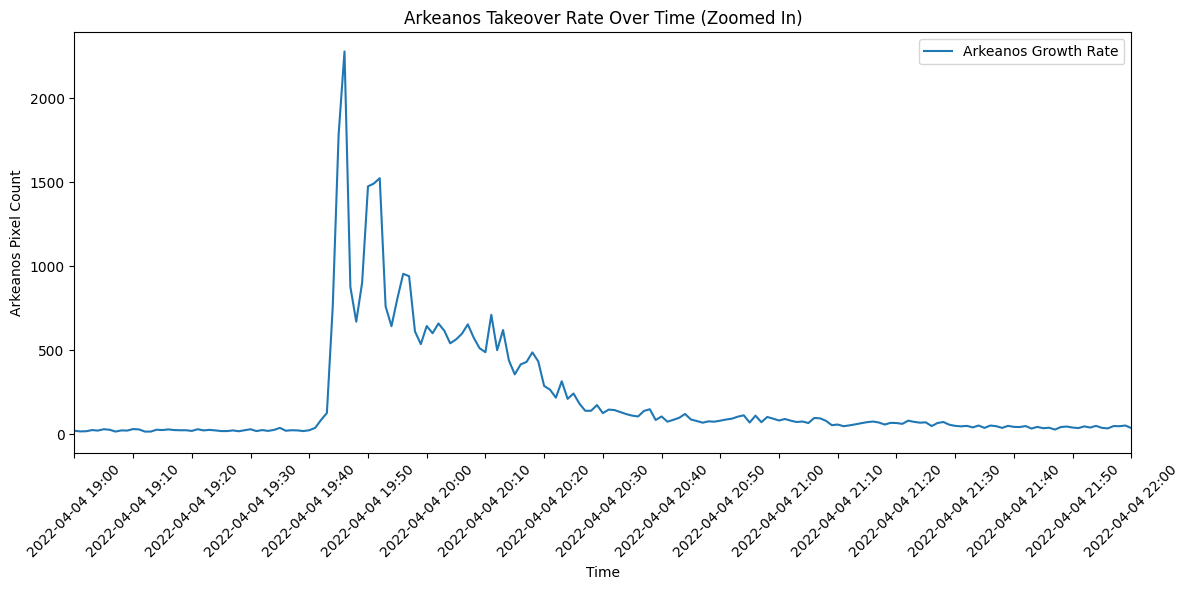

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(growth_over_time_pd["time_bin"], growth_over_time_pd["arkeanos_growth"], label="Arkeanos Growth Rate")
plt.xlabel("Time")
plt.ylabel("Arkeanos Pixel Count")
plt.title("Arkeanos Takeover Rate Over Time (Zoomed In)")

plt.xlim(pd.to_datetime("2022-04-04 19:00:00"), pd.to_datetime("2022-04-04 22:00:00")) # zoom in
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=10)) # 30 min separator
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M")) # reformat x-axis 
plt.xticks(rotation=45) # rotate

plt.tight_layout()
plt.legend()
plt.show()

- Was the takeover sudden (viral spread) or gradual?
    - sudden at time 2022-04-04 19:30
- Was there resistance (temporary decline, slow growth)?
    - pretty much no resistance, as white out soon
- What was the peak takeover period
    - 2022-04-04 19:30 - 2022-04-04 20:20 (30 min)

2. bot detection?
- high freq of pixel changes sugget bot activity?

In [69]:
df_repeats = arkeanos_data.group_by(["x", "y"]).agg(
    pl.count("time_bin").alias("time_bin_count")  # Count how many times the pixel has appeared in time_bin
).sort("time_bin_count", descending=True)  # Sort by count in descending order

df_repeats.head(10)

x,y,time_bin_count
i64,i64,u32
1672,76,30
1672,77,30
1671,77,26
1671,76,23
1651,89,21
1673,76,21
1677,133,19
1652,90,18
1672,78,18
